In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from collections import defaultdict
import nltk
import re

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junjiehan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [162]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


rows and columns of train dataset

In [4]:
train_df.shape

(7613, 5)

rows and columns of test dataset

In [5]:
test_df.shape

(3263, 4)

class distribution

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sample')

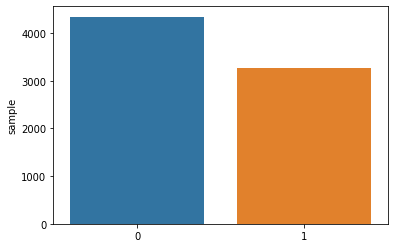

In [10]:
x = train_df.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('sample')

number of words in each tweet

In [20]:
tweet_len = train_df['text'].str.split().map(lambda x: len(x))

Text(0.5, 0, 'number of word')

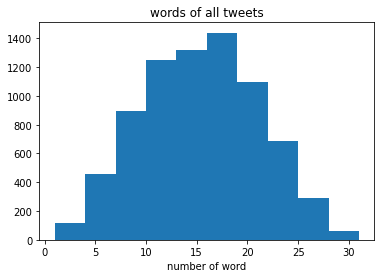

In [41]:
plt.hist(tweet_len)
plt.title('words of all tweets')
plt.xlabel('number of word')

class distribution

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


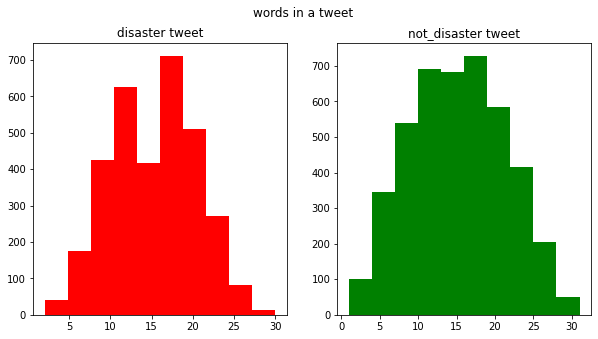

In [40]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
disaster_tweet_len = train_df[train_df['target']==1]['text'].str.split().map(lambda x:len(x))
ax1.hist(disaster_tweet_len,color='red')
ax1.set_title('disaster tweet')

not_disaster_tweet_len = train_df[train_df['target']==0]['text'].str.split().map(lambda x:len(x))
ax2.hist(not_disaster_tweet_len,color='green')
ax2.set_title('not_disaster tweet')

fig.suptitle("words in a tweet")
fig.show()

In [44]:
len(train_df[train_df['target']==0])  #number of not_disaster_tweet

4342

In [45]:
len(train_df[train_df['target']==1])  #number of disaster_tweet

3271

In [52]:
def create_corpus_dict(dataset):
    dict = defaultdict(int)
    for x in dataset['text'].str.split():
        for word in x:
            dict[word] += 1
    return dict

common stopwords

In [61]:
stop = set(stopwords.words('english'))

In [63]:
not_disaster_dict = create_corpus_dict(train_df[train_df['target']==0])

In [64]:
stop_dict_not_disaster = defaultdict(int)
for word in not_disaster_dict:
    if word in stop:
        stop_dict_not_disaster[word] = not_disaster_dict[word]

In [67]:
top = sorted(stop_dict_not_disaster.items(),key = lambda x:x[1],reverse=True)[:10]
x,y = zip(*top)

Text(0.5, 1.0, 'common stopword in not_disaster_data')

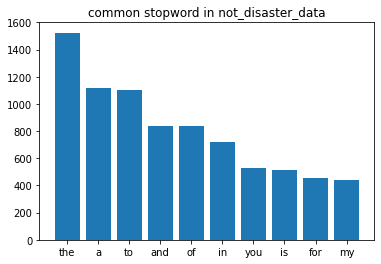

In [77]:
plt.bar(x,y)
plt.title("common stopword in not_disaster_data")

In [80]:
disaster_dict = create_corpus_dict(train_df[train_df['target']==1])
stop_dict_disaster = defaultdict(int)
for word in disaster_dict:
    if word in stop:
        stop_dict_disaster[word] = disaster_dict[word]

Text(0.5, 1.0, 'common stopword in disaster_data')

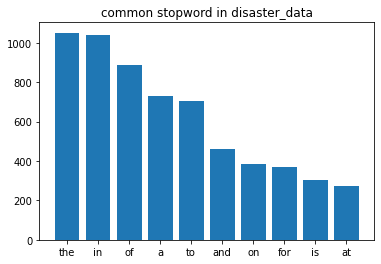

In [81]:
top = sorted(stop_dict_disaster.items(),key = lambda x:x[1],reverse=True)[:10]
x,y = zip(*top)
plt.bar(x,y)
plt.title("common stopword in disaster_data")

analyze punctuation

In [85]:
punc_token = string.punctuation

In [87]:
dic = create_corpus_dict(train_df)

In [88]:
punc_dict = defaultdict(int)
for word in dic:
    if word in punc_token:
        punc_dict[word] = dic[word]

In [94]:
x,y = zip(*punc_dict.items())

<BarContainer object of 23 artists>

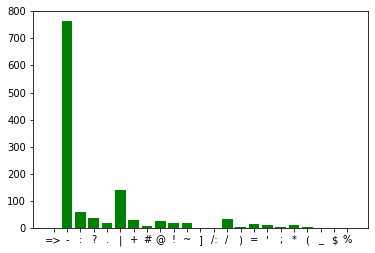

In [96]:
plt.bar(x,y,color='green')

In [146]:
import emoji

In [148]:
for word in dic:
    for character in word:
        if character in emoji.UNICODE_EMOJI:
            print(character)

©
©
©
©


In [153]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [97]:
def remove_punc(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

remove emojis

In [104]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

remove html

In [116]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

In [163]:
train_df['text'] = train_df['text'].apply(lambda x:remove_emoji(x))
train_df['text'] = train_df['text'].apply(lambda x:remove_punc(x))
train_df['text'] = train_df['text'].apply(lambda x:remove_emoji(x))
train_df['text'] = train_df['text'].apply(lambda x:remove_html(x))

In [165]:
train_df['text'][7610]

'M194 0104 UTC5km S of Volcano Hawaii httptcozDtoyd8EbJ'

common words

In [166]:
dic2 = create_corpus_dict(train_df)

In [172]:
non_stop_dic = defaultdict(int)
for word in dic2:
    if word not in stop:
        non_stop_dic[word] = dic2[word]

In [181]:
top=sorted(non_stop_dic.items(), key=lambda x:x[1],reverse=True)[:10] 

Text(0.5, 1.0, 'most common non-stop word')

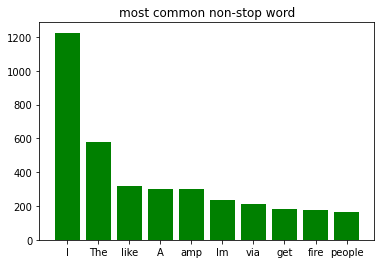

In [182]:
x,y = zip(*top)
plt.bar(x,y,color='green')
plt.title("most common non-stop word")

Text(0.5, 1.0, 'least common non-stop word')

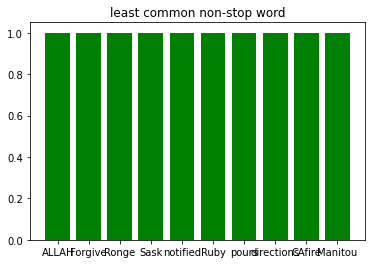

In [183]:
top=sorted(non_stop_dic.items(), key=lambda x:x[1],reverse=False)[:10] 
x,y = zip(*top)
plt.bar(x,y,color='green')
plt.title("least common non-stop word")